In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objects as go

C:\Users\rajes\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data=pd.read_csv("datasets_817556_1399448_CO2 Emissions_Canada.csv")

In [3]:
data.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
data.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [6]:
for feature in data.columns:
    print("{}".format(feature),data[feature].isnull().sum())

Make 0
Model 0
Vehicle Class 0
Engine Size(L) 0
Cylinders 0
Transmission 0
Fuel Type 0
Fuel Consumption City (L/100 km) 0
Fuel Consumption Hwy (L/100 km) 0
Fuel Consumption Comb (L/100 km) 0
Fuel Consumption Comb (mpg) 0
CO2 Emissions(g/km) 0


In [8]:
object_type=[]
numerical=[]
for feature in data.columns:
    if data[feature].dtypes=='object':
        object_type.append(feature)
        
for feature in data.columns:
    if data[feature].dtypes!='object':
        numerical.append(feature)

In [10]:
object_type, numerical

(['Make', 'Model', 'Vehicle Class', 'Transmission', 'Fuel Type'],
 ['Engine Size(L)',
  'Cylinders',
  'Fuel Consumption City (L/100 km)',
  'Fuel Consumption Hwy (L/100 km)',
  'Fuel Consumption Comb (L/100 km)',
  'Fuel Consumption Comb (mpg)',
  'CO2 Emissions(g/km)'])

In [11]:
data.isna().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

In [12]:
data.isnull().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

In [13]:
data.rename({"Vehicle Class" : "vehicle_class"})

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232


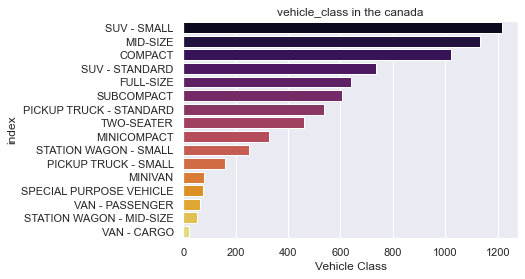

In [14]:
sns.set()
plt.title("vehicle_class in the canada")
sns.barplot(y="index", x = "Vehicle Class", data = data['Vehicle Class'].value_counts().reset_index(), palette="inferno")
plt.show()


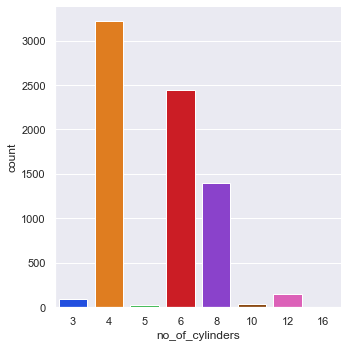

In [15]:
temp = data.Cylinders.value_counts().reset_index().rename(columns = {"index": "no_of_cylinders", "Cylinders": "count"})
sns.set()
sns.catplot(x="no_of_cylinders", y ="count", data = temp, kind = "bar", palette="bright")
plt.show()

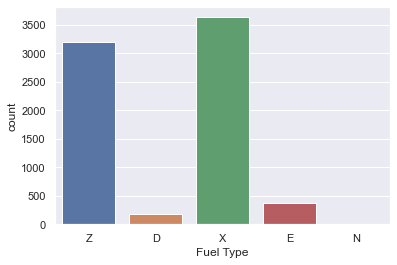

In [16]:
sns.set()
sns.countplot(data['Fuel Type'])
plt.show()

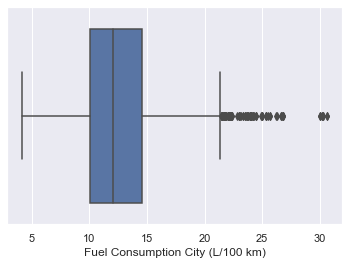

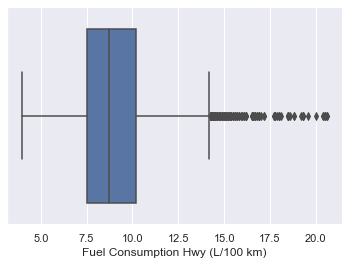

In [17]:
sns.boxplot(data['Fuel Consumption City (L/100 km)'])
plt.show()
sns.boxplot(data['Fuel Consumption Hwy (L/100 km)'])
plt.show()

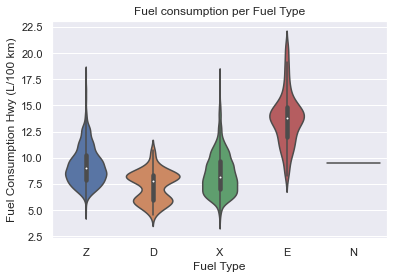

In [18]:
plt.title('Fuel consumption per Fuel Type')
sns.violinplot(y=data['Fuel Consumption Hwy (L/100 km)'], x=data['Fuel Type'], data=data)
plt.show()

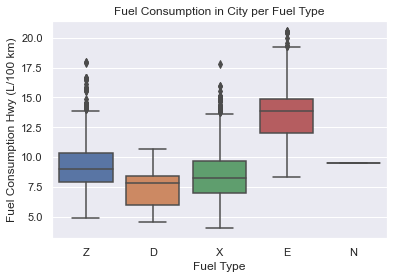

In [19]:
plt.title('Fuel Consumption in City per Fuel Type')
sns.boxplot(y='Fuel Consumption Hwy (L/100 km)', x=data['Fuel Type'], data=data)
plt.show()

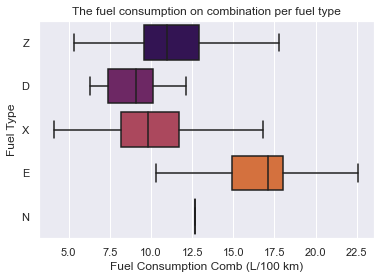

In [20]:

sns.set()
plt.title("The fuel consumption on combination per fuel type")
sns.boxplot(x="Fuel Consumption Comb (L/100 km)", y = "Fuel Type", data= data, palette="inferno", sym = "")
plt.show()


[]

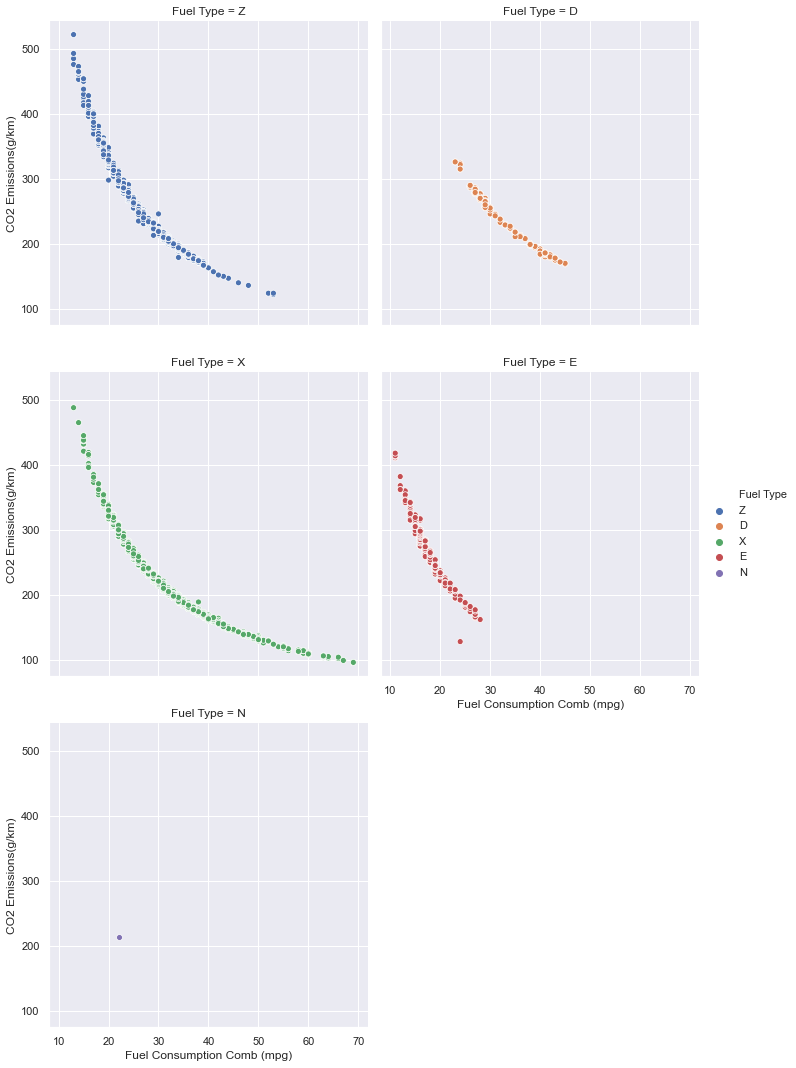

In [21]:
sns.relplot(x='Fuel Consumption Comb (mpg)', y='CO2 Emissions(g/km)', data=data, hue='Fuel Type', col='Fuel Type', col_wrap=2)
plt.plot()

In [22]:
data['Transmission'].value_counts()

AS6     1324
AS8     1211
M6       901
A6       789
A8       490
AM7      445
A9       339
AS7      319
AV       295
M5       193
AS10     168
AM6      132
AV7      118
AV6      113
M7        91
A5        84
AS9       77
A4        65
AM8       62
A7        53
AV8       39
A10       31
AS5       26
AV10      11
AM5        4
AM9        3
AS4        2
Name: Transmission, dtype: int64

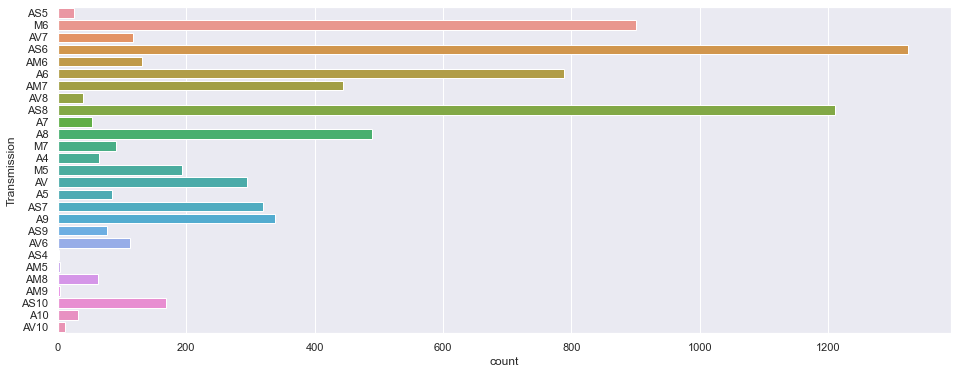

In [23]:
plt.figure(figsize=(16,6))
sns.countplot(y='Transmission',data=data )
plt.show()

In [24]:
temp1= data.groupby("Fuel Type")['CO2 Emissions(g/km)'].mean().reset_index()

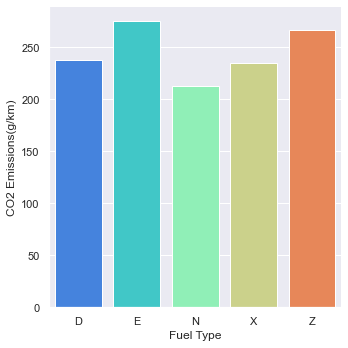

In [25]:
sns.set()
sns.catplot(x='Fuel Type', y='CO2 Emissions(g/km)', data=temp1, kind='bar', palette='rainbow')
plt.show()

In [28]:
temp2=round(data.groupby('Vehicle Class')['CO2 Emissions(g/km)'].mean().reset_index(),2)


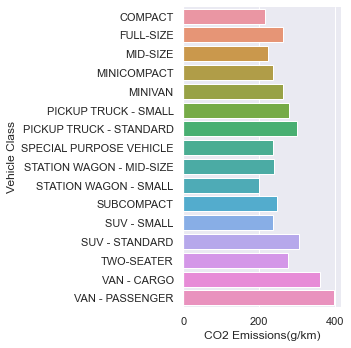

In [29]:
sns.set()
sns.catplot(x='CO2 Emissions(g/km)', y='Vehicle Class', data= temp2, kind='bar')
plt.show()